In [18]:
#Importing library
import re
import pandas as pd
import os
import numpy as np
import requests
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import matplotlib.dates as mdates

In [19]:
#To have access to the dataset
url = 'https://drive.google.com/uc?id=18EhtKGjkQSmPcBB5uNpMlgFdCBS0r-8-&export=download' 

# Fetch the content from the URL
response = requests.get(url)
data = response.text

# Now you can work with the 'data' variable, which contains the file content
print(data)

10/13/23, 1:14 AM - +7 910 431-20-02 created group "ASECAM 🇨🇲"
10/13/23, 1:14 AM - You were added
6/7/24, 2:35 PM - Eva🌹: Donc le rouble ne va plus jamais atteindre 7??😓
6/7/24, 2:35 PM - Yvan Kouepo: 😂
6/7/24, 2:39 PM - SOYONS SEULEMENT FORT: Tu rêves encore !!!! Il faut attendre 7ans au moins
6/7/24, 2:39 PM - SOYONS SEULEMENT FORT: Travaille beaucoup l'argent et cela va atteindre 6,999999999 fort qui menace 7.
6/7/24, 5:54 PM - le facilitateur: ✈️Départ imminent ✈️
Douala 🇨🇲 ✈️ ✈️ Moscou 🇷🇺
* *11 juin 2024*
✅ 23 kilos disponibles
✅ Documents attendus
✅ Appareils électronique
✅ Médicaments et autres.

*Le facilitateur, vous faciliter la tâche c'est mon credo* 🫡
Contactez: +79888341550
6/7/24, 10:05 PM - Christian: <Media omitted>
6/8/24, 3:36 AM - +237 6 55 80 07 87 left
6/8/24, 6:45 AM - Keren: Good morning please my sister got a scholarship at hse but she needs to go back to my home country for them to extend her visa please is there another solution she can do to not go back to Ca

In [21]:
#pattern = '\d{1,2}/\d{1,2}/\d{2,4}, \s\d{1,2}: \d{2}\s-\s'
pattern = r"^(?P<Date>\d{1,2}/\d{1,2}/\d{2,4}),\s+(?P<Time>[\d:]+(?:\S*\s?[AP]M)?)\s+-\s+(?:(?P<Sender>.*?):\s+)?(?P<Message>.*)$"


In [28]:
# geting all the raw messages
messages = re.split (pattern, data)
messages
print(messages)

['10/13/23, 1:14\u202fAM - +7 910 431-20-02 created group "ASECAM 🇨🇲"\n10/13/23, 1:14\u202fAM - You were added\n6/7/24, 2:35\u202fPM - Eva🌹: Donc le rouble ne va plus jamais atteindre 7??😓\n6/7/24, 2:35\u202fPM - Yvan Kouepo: 😂\n6/7/24, 2:39\u202fPM - SOYONS SEULEMENT FORT: Tu rêves encore !!!! Il faut attendre 7ans au moins\n6/7/24, 2:39\u202fPM - SOYONS SEULEMENT FORT: Travaille beaucoup l\'argent et cela va atteindre 6,999999999 fort qui menace 7.\n6/7/24, 5:54\u202fPM - le facilitateur: ✈️Départ imminent ✈️\nDouala 🇨🇲 ✈️ ✈️ Moscou 🇷🇺\n* *11 juin 2024*\n✅ 23 kilos disponibles\n✅ Documents attendus\n✅ Appareils électronique\n✅ Médicaments et autres.\n\n*Le facilitateur, vous faciliter la tâche c\'est mon credo* \U0001fae1\nContactez: +79888341550\n6/7/24, 10:05\u202fPM - Christian: <Media omitted>\n6/8/24, 3:36\u202fAM - +237 6 55 80 07 87 left\n6/8/24, 6:45\u202fAM - Keren: Good morning please my sister got a scholarship at hse but she needs to go back to my home country for them to

In [6]:

pattern = r"^(?P<Date>\d{1,2}/\d{1,2}/\d{2,4}),\s+[\d:]+(?:\S*\s?[AP]M)?\s+-\s+(?P<Sender>[^:]+):\s+(?P<Message>.*)$"
filtered_messages = []

for line in data.strip().split("\n"):
    match = re.match(pattern, line)
    if match:
        entry = match.groupdict()
        sender = entry.get("Sender")  # Get sender, could be None
        if sender and sender.strip().lower() != "system":  # Check if sender is not None
            filtered_messages.append(f"{sender.strip()}: {entry['Message']}")


filtered_messages


['Eva🌹: Donc le rouble ne va plus jamais atteindre 7??😓',
 'Yvan Kouepo: 😂',
 'SOYONS SEULEMENT FORT: Tu rêves encore !!!! Il faut attendre 7ans au moins',
 "SOYONS SEULEMENT FORT: Travaille beaucoup l'argent et cela va atteindre 6,999999999 fort qui menace 7.",
 'le facilitateur: ✈️Départ imminent ✈️',
 'Christian: <Media omitted>',
 'Keren: Good morning please my sister got a scholarship at hse but she needs to go back to my home country for them to extend her visa please is there another solution she can do to not go back to Cameroon',
 'hansly: She has to finish with recognition and enrollment before the 14th of July the will extend her visa and she will not go back.',
 'Raphael: <Media omitted>',
 '+7 980 072-66-82: Le lien du match stp',
 '+7 980 072-66-82: Svp*',
 'hansly: https://www.youtube.com/live/bGT4kn9Ssls?si=ENLyuBT_qcLb3sV-',
 '💸7G SERVICES 🇨🇲🇷🇺: https://www.streamonsport.ru/4801-lien-cameroun-cap-vert-en-streaming-coupe-du-monde.html',
 '🦁Florent Biloa: https://streame

In [8]:
print(len(filtered_messages))

17811


In [17]:
pattern_dt = r"^(\d{1,2}/\d{1,2}/\d{2,4}),\s+([\d:]+(?:\S*\s?[AP]M)?)"
# getting the raw dates
dates_times = re.findall(pattern_dt, data, flags=re.MULTILINE)

# Remove the unwanted substring "â€¯" from the time part
clean_dates_times = [(date, time.replace("â€¯", " ")) for date, time in dates_times]

clean_dates_times


[('10/13/23', '1:14\u202fAM'),
 ('10/13/23', '1:14\u202fAM'),
 ('6/7/24', '2:35\u202fPM'),
 ('6/7/24', '2:35\u202fPM'),
 ('6/7/24', '2:39\u202fPM'),
 ('6/7/24', '2:39\u202fPM'),
 ('6/7/24', '5:54\u202fPM'),
 ('6/7/24', '10:05\u202fPM'),
 ('6/8/24', '3:36\u202fAM'),
 ('6/8/24', '6:45\u202fAM'),
 ('6/8/24', '6:51\u202fAM'),
 ('6/8/24', '1:32\u202fPM'),
 ('6/8/24', '4:00\u202fPM'),
 ('6/8/24', '4:00\u202fPM'),
 ('6/8/24', '4:06\u202fPM'),
 ('6/8/24', '4:10\u202fPM'),
 ('6/8/24', '4:17\u202fPM'),
 ('6/8/24', '4:31\u202fPM'),
 ('6/8/24', '4:33\u202fPM'),
 ('6/8/24', '4:34\u202fPM'),
 ('6/8/24', '4:40\u202fPM'),
 ('6/8/24', '4:41\u202fPM'),
 ('6/8/24', '4:43\u202fPM'),
 ('6/8/24', '4:44\u202fPM'),
 ('6/8/24', '4:45\u202fPM'),
 ('6/8/24', '4:46\u202fPM'),
 ('6/8/24', '4:47\u202fPM'),
 ('6/8/24', '4:49\u202fPM'),
 ('6/8/24', '4:49\u202fPM'),
 ('6/8/24', '4:52\u202fPM'),
 ('6/8/24', '4:52\u202fPM'),
 ('6/8/24', '4:53\u202fPM'),
 ('6/8/24', '4:55\u202fPM'),
 ('6/8/24', '4:55\u202fPM'),
 ('6/8/24

In [10]:


pattern = r"^(?P<Date>\d{1,2}/\d{1,2}/\d{2,4}),\s+(?P<Time>[\d:]+(?:\S*\s?[AP]M)?)\s+-\s+(?:(?P<Sender>.*?):\s+)?(?P<Message>.*)$"
# removing the system dates
valid_dates = []

for line in data.strip().split('\n'):
    match = re.match(pattern, line)
    if match:
        entry = match.groupdict()
        # If there's a sender, we keep the date
        if entry["Sender"] is not None:
            valid_dates.append(f"{entry['Date']}, {entry['Time'].replace('â€¯', ' ')}")

valid_dates

['6/7/24, 2:35\u202fPM',
 '6/7/24, 2:35\u202fPM',
 '6/7/24, 2:39\u202fPM',
 '6/7/24, 2:39\u202fPM',
 '6/7/24, 5:54\u202fPM',
 '6/7/24, 10:05\u202fPM',
 '6/8/24, 6:45\u202fAM',
 '6/8/24, 6:51\u202fAM',
 '6/8/24, 1:32\u202fPM',
 '6/8/24, 4:00\u202fPM',
 '6/8/24, 4:00\u202fPM',
 '6/8/24, 4:06\u202fPM',
 '6/8/24, 4:10\u202fPM',
 '6/8/24, 4:17\u202fPM',
 '6/8/24, 4:31\u202fPM',
 '6/8/24, 4:33\u202fPM',
 '6/8/24, 4:34\u202fPM',
 '6/8/24, 4:40\u202fPM',
 '6/8/24, 4:41\u202fPM',
 '6/8/24, 4:43\u202fPM',
 '6/8/24, 4:44\u202fPM',
 '6/8/24, 4:45\u202fPM',
 '6/8/24, 4:46\u202fPM',
 '6/8/24, 4:47\u202fPM',
 '6/8/24, 4:49\u202fPM',
 '6/8/24, 4:49\u202fPM',
 '6/8/24, 4:52\u202fPM',
 '6/8/24, 4:52\u202fPM',
 '6/8/24, 4:53\u202fPM',
 '6/8/24, 4:55\u202fPM',
 '6/8/24, 4:55\u202fPM',
 '6/8/24, 4:55\u202fPM',
 '6/8/24, 4:56\u202fPM',
 '6/8/24, 4:56\u202fPM',
 '6/8/24, 4:56\u202fPM',
 '6/8/24, 4:56\u202fPM',
 '6/8/24, 4:56\u202fPM',
 '6/8/24, 4:57\u202fPM',
 '6/8/24, 5:07\u202fPM',
 '6/8/24, 5:20\u202fPM',

In [11]:
print(len(valid_dates))

17811


In [101]:

# Create the DataFrame from  the filtered_messages  and valid_dates
df = pd.DataFrame({'user_message': filtered_messages, 'message_date': valid_dates})

df['message_date'] = pd.to_datetime(df['message_date'], format='%m/%d/%y, %I:%M %p')

# Rename the 'message_date' column to 'date'
df.rename(columns={'message_date': 'date'}, inplace=True)

# Display the first few rows of the DataFrame
df.head()


user_message                date
0  EvağŸŒ¹: Donc le rouble ne va plus jamais atte... 2024-06-07 14:35:00
1                                  Yvan Kouepo: ğŸ˜‚ 2024-06-07 14:35:00
2  SOYONS SEULEMENT FORT: Tu rÃªves encore !!!! I... 2024-06-07 14:39:00
3  SOYONS SEULEMENT FORT: Travaille beaucoup l'ar... 2024-06-07 14:39:00
4     le facilitateur: âœˆï¸�DÃ©part imminent âœˆï¸� 2024-06-07 17:54:00

In [103]:
df.shape

(17811, 2)

In [105]:
# Separate Users and Messages
users = []
messages = []
pattern = r"^(.*?):\s(.*)$"  # Matches "User: Message"

for message in df["user_message"]:
    match = re.match(pattern, message)
    if match:
        users.append(match.group(1))  # Extract username
        messages.append(match.group(2))  # Extract message
    else:
        users.append("group_notification")
        messages.append(message)

df["user"] = users
df["message"] = messages

# Drop original column
df.drop(columns=["user_message"], inplace=True)

df


date                     user  \
0     2024-06-07 14:35:00                  EvağŸŒ¹   
1     2024-06-07 14:35:00              Yvan Kouepo   
2     2024-06-07 14:39:00    SOYONS SEULEMENT FORT   
3     2024-06-07 14:39:00    SOYONS SEULEMENT FORT   
4     2024-06-07 17:54:00          le facilitateur   
...                   ...                      ...   
17806 2025-02-17 08:08:00                LauriğŸ’•   
17807 2025-02-17 08:09:00  Ğ˜Ğ¼Ğ¿ĞµÑ€Ğ°Ñ‚Ğ¾Ñ€ ğŸ’«   
17808 2025-02-17 08:09:00                   hansly   
17809 2025-02-17 08:41:00                  EvağŸŒ¹   
17810 2025-02-17 08:41:00                  EvağŸŒ¹   

                                                 message  
0      Donc le rouble ne va plus jamais atteindre 7??...  
1                                                   ğŸ˜‚  
2      Tu rÃªves encore !!!! Il faut attendre 7ans au...  
3      Travaille beaucoup l'argent et cela va atteind...  
4                          âœˆï¸�DÃ©part imminent âœˆï¸�  
...                                                  ...  
17806             Nobi bad talk oo but no stress me ğŸ˜‚  
17807                  HBD Ã  la deuxiÃ¨me femme mariÃ©e  
17808                                     Hbd to you all  
17809  Hbd LaurichouğŸ¥°ğŸ¥°ğŸ¥°ğŸ¥°ğŸ¥°ğŸ¥ºğŸ˜˜ğŸ˜˜ğ...  
17810  Joyeux anniversaire, Elomo Mba JoÃ«lle Nadege ...  

[17811 rows x 3 columns]

In [107]:
df['year'] = df['date'].dt.year

In [31]:
df

date                     user  \
0     2024-06-07 14:35:00                  EvağŸŒ¹   
1     2024-06-07 14:35:00              Yvan Kouepo   
2     2024-06-07 14:39:00    SOYONS SEULEMENT FORT   
3     2024-06-07 14:39:00    SOYONS SEULEMENT FORT   
4     2024-06-07 17:54:00          le facilitateur   
...                   ...                      ...   
17806 2025-02-17 08:08:00                LauriğŸ’•   
17807 2025-02-17 08:09:00  Ğ˜Ğ¼Ğ¿ĞµÑ€Ğ°Ñ‚Ğ¾Ñ€ ğŸ’«   
17808 2025-02-17 08:09:00                   hansly   
17809 2025-02-17 08:41:00                  EvağŸŒ¹   
17810 2025-02-17 08:41:00                  EvağŸŒ¹   

                                                 message  year  
0      Donc le rouble ne va plus jamais atteindre 7??...  2024  
1                                                   ğŸ˜‚  2024  
2      Tu rÃªves encore !!!! Il faut attendre 7ans au...  2024  
3      Travaille beaucoup l'argent et cela va atteind...  2024  
4                          âœˆï¸�DÃ©part imminent âœˆï¸�  2024  
...                                                  ...   ...  
17806             Nobi bad talk oo but no stress me ğŸ˜‚  2025  
17807                  HBD Ã  la deuxiÃ¨me femme mariÃ©e  2025  
17808                                     Hbd to you all  2025  
17809  Hbd LaurichouğŸ¥°ğŸ¥°ğŸ¥°ğŸ¥°ğŸ¥°ğŸ¥ºğŸ˜˜ğŸ˜˜ğ...  2025  
17810  Joyeux anniversaire, Elomo Mba JoÃ«lle Nadege ...  2025  

[17811 rows x 4 columns]

In [109]:
df['month'] = df['date'].dt.month_name()

In [35]:
df

date                     user  \
0     2024-06-07 14:35:00                  EvağŸŒ¹   
1     2024-06-07 14:35:00              Yvan Kouepo   
2     2024-06-07 14:39:00    SOYONS SEULEMENT FORT   
3     2024-06-07 14:39:00    SOYONS SEULEMENT FORT   
4     2024-06-07 17:54:00          le facilitateur   
...                   ...                      ...   
17806 2025-02-17 08:08:00                LauriğŸ’•   
17807 2025-02-17 08:09:00  Ğ˜Ğ¼Ğ¿ĞµÑ€Ğ°Ñ‚Ğ¾Ñ€ ğŸ’«   
17808 2025-02-17 08:09:00                   hansly   
17809 2025-02-17 08:41:00                  EvağŸŒ¹   
17810 2025-02-17 08:41:00                  EvağŸŒ¹   

                                                 message  year     month  
0      Donc le rouble ne va plus jamais atteindre 7??...  2024      June  
1                                                   ğŸ˜‚  2024      June  
2      Tu rÃªves encore !!!! Il faut attendre 7ans au...  2024      June  
3      Travaille beaucoup l'argent et cela va atteind...  2024      June  
4                          âœˆï¸�DÃ©part imminent âœˆï¸�  2024      June  
...                                                  ...   ...       ...  
17806             Nobi bad talk oo but no stress me ğŸ˜‚  2025  February  
17807                  HBD Ã  la deuxiÃ¨me femme mariÃ©e  2025  February  
17808                                     Hbd to you all  2025  February  
17809  Hbd LaurichouğŸ¥°ğŸ¥°ğŸ¥°ğŸ¥°ğŸ¥°ğŸ¥ºğŸ˜˜ğŸ˜˜ğ...  2025  February  
17810  Joyeux anniversaire, Elomo Mba JoÃ«lle Nadege ...  2025  February  

[17811 rows x 5 columns]

In [111]:
df['day'] = df['date'].dt.day

In [39]:
df

date                     user  \
0     2024-06-07 14:35:00                  EvağŸŒ¹   
1     2024-06-07 14:35:00              Yvan Kouepo   
2     2024-06-07 14:39:00    SOYONS SEULEMENT FORT   
3     2024-06-07 14:39:00    SOYONS SEULEMENT FORT   
4     2024-06-07 17:54:00          le facilitateur   
...                   ...                      ...   
17806 2025-02-17 08:08:00                LauriğŸ’•   
17807 2025-02-17 08:09:00  Ğ˜Ğ¼Ğ¿ĞµÑ€Ğ°Ñ‚Ğ¾Ñ€ ğŸ’«   
17808 2025-02-17 08:09:00                   hansly   
17809 2025-02-17 08:41:00                  EvağŸŒ¹   
17810 2025-02-17 08:41:00                  EvağŸŒ¹   

                                                 message  year     month  day  
0      Donc le rouble ne va plus jamais atteindre 7??...  2024      June    7  
1                                                   ğŸ˜‚  2024      June    7  
2      Tu rÃªves encore !!!! Il faut attendre 7ans au...  2024      June    7  
3      Travaille beaucoup l'argent et cela va atteind...  2024      June    7  
4                          âœˆï¸�DÃ©part imminent âœˆï¸�  2024      June    7  
...                                                  ...   ...       ...  ...  
17806             Nobi bad talk oo but no stress me ğŸ˜‚  2025  February   17  
17807                  HBD Ã  la deuxiÃ¨me femme mariÃ©e  2025  February   17  
17808                                     Hbd to you all  2025  February   17  
17809  Hbd LaurichouğŸ¥°ğŸ¥°ğŸ¥°ğŸ¥°ğŸ¥°ğŸ¥ºğŸ˜˜ğŸ˜˜ğ...  2025  February   17  
17810  Joyeux anniversaire, Elomo Mba JoÃ«lle Nadege ...  2025  February   17  

[17811 rows x 6 columns]

In [113]:
df['hour'] = df['date'].dt.hour

In [115]:
df['minute'] = df['date'].dt.minute

In [117]:
df

date                     user  \
0     2024-06-07 14:35:00                  EvağŸŒ¹   
1     2024-06-07 14:35:00              Yvan Kouepo   
2     2024-06-07 14:39:00    SOYONS SEULEMENT FORT   
3     2024-06-07 14:39:00    SOYONS SEULEMENT FORT   
4     2024-06-07 17:54:00          le facilitateur   
...                   ...                      ...   
17806 2025-02-17 08:08:00                LauriğŸ’•   
17807 2025-02-17 08:09:00  Ğ˜Ğ¼Ğ¿ĞµÑ€Ğ°Ñ‚Ğ¾Ñ€ ğŸ’«   
17808 2025-02-17 08:09:00                   hansly   
17809 2025-02-17 08:41:00                  EvağŸŒ¹   
17810 2025-02-17 08:41:00                  EvağŸŒ¹   

                                                 message  year     month  day  \
0      Donc le rouble ne va plus jamais atteindre 7??...  2024      June    7   
1                                                   ğŸ˜‚  2024      June    7   
2      Tu rÃªves encore !!!! Il faut attendre 7ans au...  2024      June    7   
3      Travaille beaucoup l'argent et cela va atteind...  2024      June    7   
4                          âœˆï¸�DÃ©part imminent âœˆï¸�  2024      June    7   
...                                                  ...   ...       ...  ...   
17806             Nobi bad talk oo but no stress me ğŸ˜‚  2025  February   17   
17807                  HBD Ã  la deuxiÃ¨me femme mariÃ©e  2025  February   17   
17808                                     Hbd to you all  2025  February   17   
17809  Hbd LaurichouğŸ¥°ğŸ¥°ğŸ¥°ğŸ¥°ğŸ¥°ğŸ¥ºğŸ˜˜ğŸ˜˜ğ...  2025  February   17   
17810  Joyeux anniversaire, Elomo Mba JoÃ«lle Nadege ...  2025  February   17   

       hour  minute  
0        14      35  
1        14      35  
2        14      39  
3        14      39  
4        17      54  
...     ...     ...  
17806     8       8  
17807     8       9  
17808     8       9  
17809     8      41  
17810     8      41  

[17811 rows x 8 columns]

In [47]:
# Total number of messages
total_messages = len(df)
total_messages

17811

In [49]:
print(df["month"].unique())


['June' 'July' 'August' 'September' 'October' 'November' 'December'
 'January' 'February']


In [119]:
# Total number of media shared (assuming WhatsApp format like "[Media omitted]")
total_media = df["message"].str.contains(r"\[Media omitted\]", regex=True, na=False).sum()
total_media

0

In [123]:
# Total number of links shared (checking for http or www)
url_pattern = r"(https?://\S+|www\.\S+)"
total_links = df["message"].str.contains(url_pattern, regex=True, na=False).sum()
total_links

/var/folders/kx/kq2v000162z1pfdtggd2fwmm0000gp/T/ipykernel_25235/3210783774.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  total_links = df["message"].str.contains(url_pattern, regex=True, na=False).sum()


138

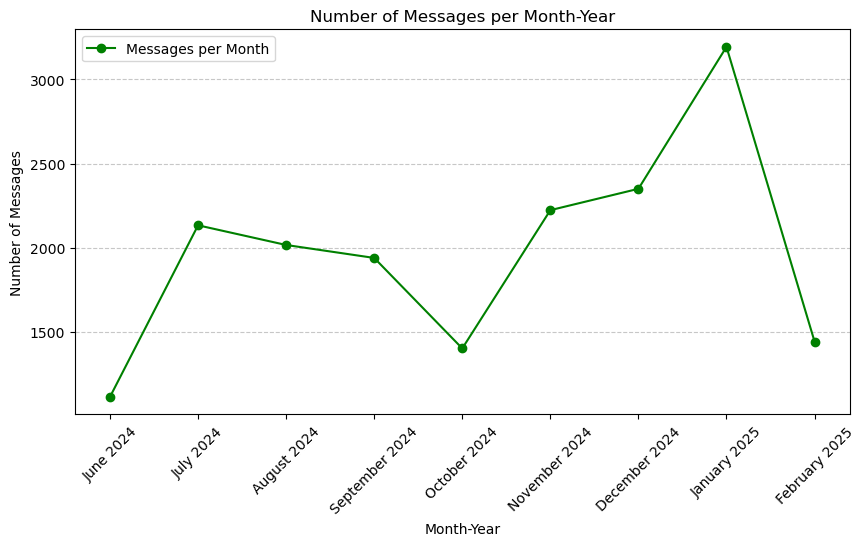

In [125]:
# Extract month and year in "Month Year" format
df["month_year"] = df["date"].dt.strftime("%B %Y")

# Count messages per month-year
monthly_counts = df.groupby("month_year").size().reset_index(name="count")

# Convert "month_year" back to datetime for proper sorting
monthly_counts["month_year"] = pd.to_datetime(monthly_counts["month_year"], format="%B %Y")

# Sort chronologically
monthly_counts = monthly_counts.sort_values("month_year")

# Convert back to string format for display
monthly_counts["month_year"] = monthly_counts["month_year"].dt.strftime("%B %Y")

# Plot the results using a line graph
plt.figure(figsize=(10, 5))
plt.plot(monthly_counts["month_year"], monthly_counts["count"], marker="o", linestyle="-", color="g", label="Messages per Month")
plt.xlabel("Month-Year")
plt.ylabel("Number of Messages")
plt.title("Number of Messages per Month-Year")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()

# Show the plot
plt.show()

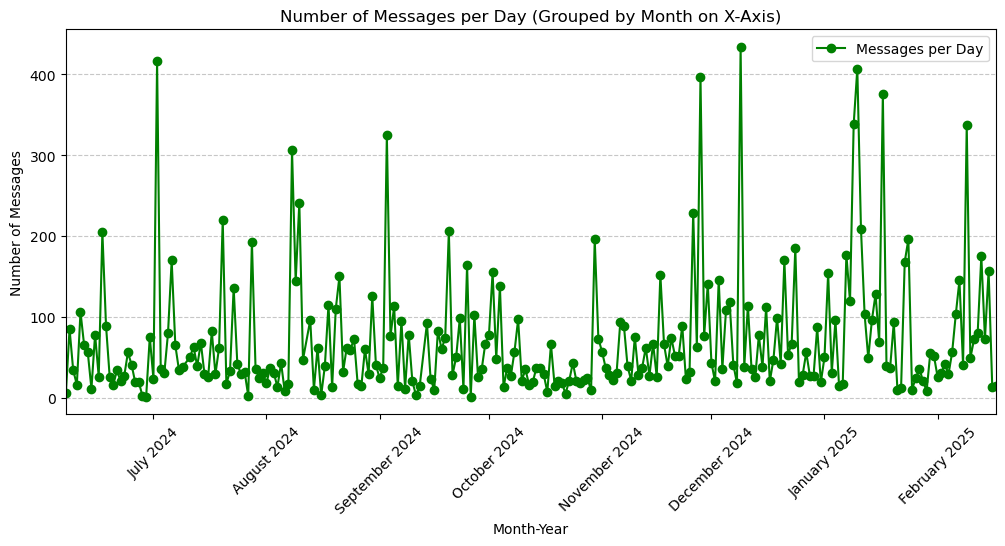

In [127]:

# Ensure 'year', 'month', and 'day' exist in the dataframe
df["month"] = df["month"].astype(str)  # Ensure month is string
df["year"] = df["year"].astype(int)  # Ensure year is int
df["day"] = df["day"].astype(int)  # Ensure day is int

# ✅ Convert 'month' to numerical format (if it's in string format like "June")
df["month"] = pd.to_datetime(df["month"], format="%B").dt.month  

# ✅ Construct proper datetime column
df["date"] = pd.to_datetime(df[["year", "month", "day"]])

# ✅ Count messages per day
daily_counts = df.groupby("date").size().reset_index(name="count")

# ✅ Sort chronologically
daily_counts = daily_counts.sort_values("date")

# ✅ Plot the results
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(daily_counts["date"], daily_counts["count"], marker="o", linestyle="-", color="g", label="Messages per Day")

# ✅ Set X-axis to show months properly
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Show months
ax.xaxis.set_major_formatter(mdates.DateFormatter("%B %Y"))  # Format as "Month Year"
ax.set_xlim([daily_counts["date"].min(), daily_counts["date"].max()])  # Ensure correct range

# Labels and title
plt.xlabel("Month-Year")
plt.ylabel("Number of Messages")
plt.title("Number of Messages per Day (Grouped by Month on X-Axis)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()

# Show the plot
plt.show()


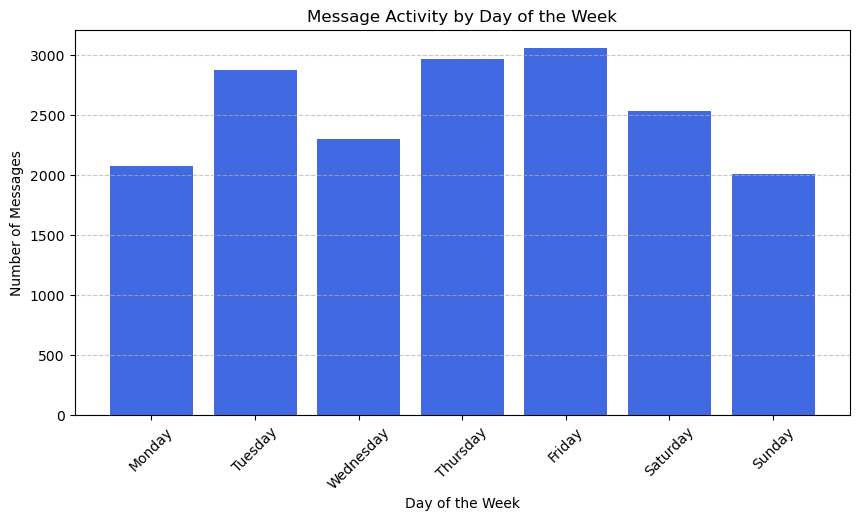

In [129]:

# ✅ Ensure 'date' is in datetime format
df["date"] = pd.to_datetime(df["date"])

# ✅ Extract the day of the week
df["weekday"] = df["date"].dt.day_name()

# ✅ Group messages by weekday
busy_weekdays = df.groupby("weekday").size().reset_index(name="count")

# ✅ Sort the days in proper order
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
busy_weekdays["weekday"] = pd.Categorical(busy_weekdays["weekday"], categories=weekday_order, ordered=True)
busy_weekdays = busy_weekdays.sort_values("weekday")

# ✅ Plot the number of messages per weekday
plt.figure(figsize=(10, 5))
plt.bar(busy_weekdays["weekday"], busy_weekdays["count"], color="royalblue")

# Labels and title
plt.xlabel("Day of the Week")
plt.ylabel("Number of Messages")
plt.title("Message Activity by Day of the Week")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


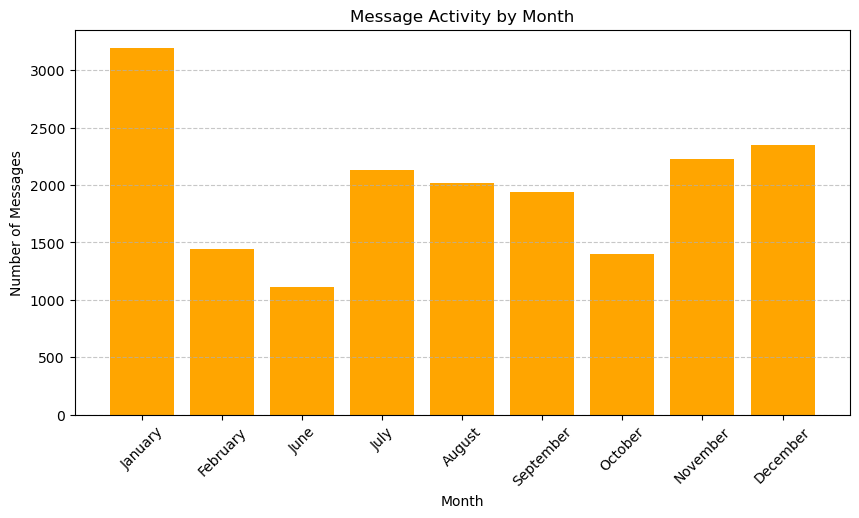

In [131]:

# ✅ Ensure 'date' is in datetime format
df["date"] = pd.to_datetime(df["date"])

# ✅ Extract month name
df["month"] = df["date"].dt.month_name()

# ✅ Group by month and count messages
busy_months = df.groupby("month").size().reset_index(name="count")

# ✅ Sort months in correct order
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]
busy_months["month"] = pd.Categorical(busy_months["month"], categories=month_order, ordered=True)
busy_months = busy_months.sort_values("month")

# ✅ Plot the data
plt.figure(figsize=(10, 5))
plt.bar(busy_months["month"], busy_months["count"], color="orange")

# Labels and title
plt.xlabel("Month")
plt.ylabel("Number of Messages")
plt.title("Message Activity by Month")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


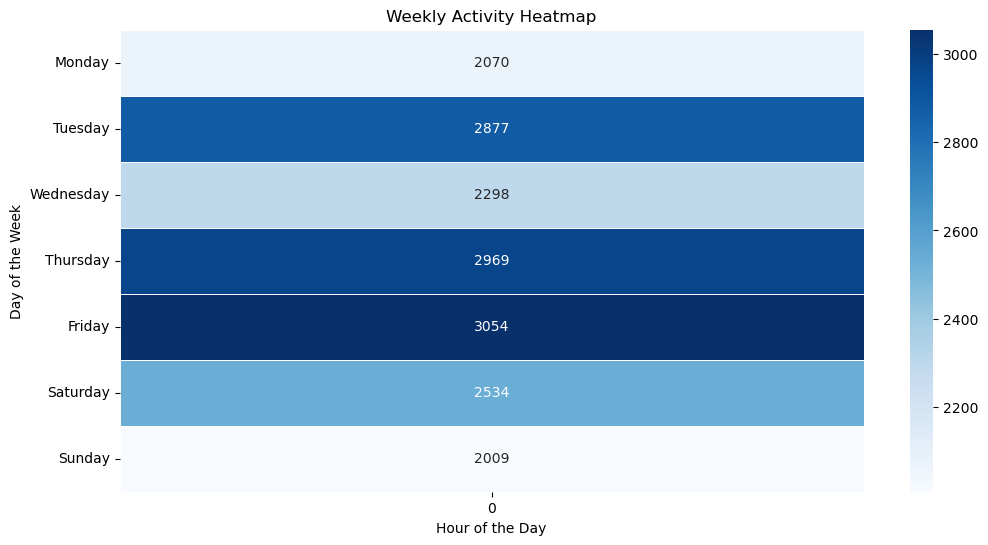

In [133]:


# ✅ Ensure 'date' is in datetime format
df["date"] = pd.to_datetime(df["date"])

# ✅ Extract the day of the week and hour
df["day_of_week"] = df["date"].dt.day_name()
df["hour"] = df["date"].dt.hour

# ✅ Group by day of the week and hour, then count messages
weekly_activity = df.groupby(["day_of_week", "hour"]).size().reset_index(name="count")

# ✅ Pivot table for heatmap
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
heatmap_data = weekly_activity.pivot(index="day_of_week", columns="hour", values="count").reindex(day_order)

# ✅ Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="Blues", annot=True, fmt=".0f", linewidths=0.5)

# Labels and title
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.title("Weekly Activity Heatmap")
plt.xticks(rotation=0)

# Show the plot
plt.show()


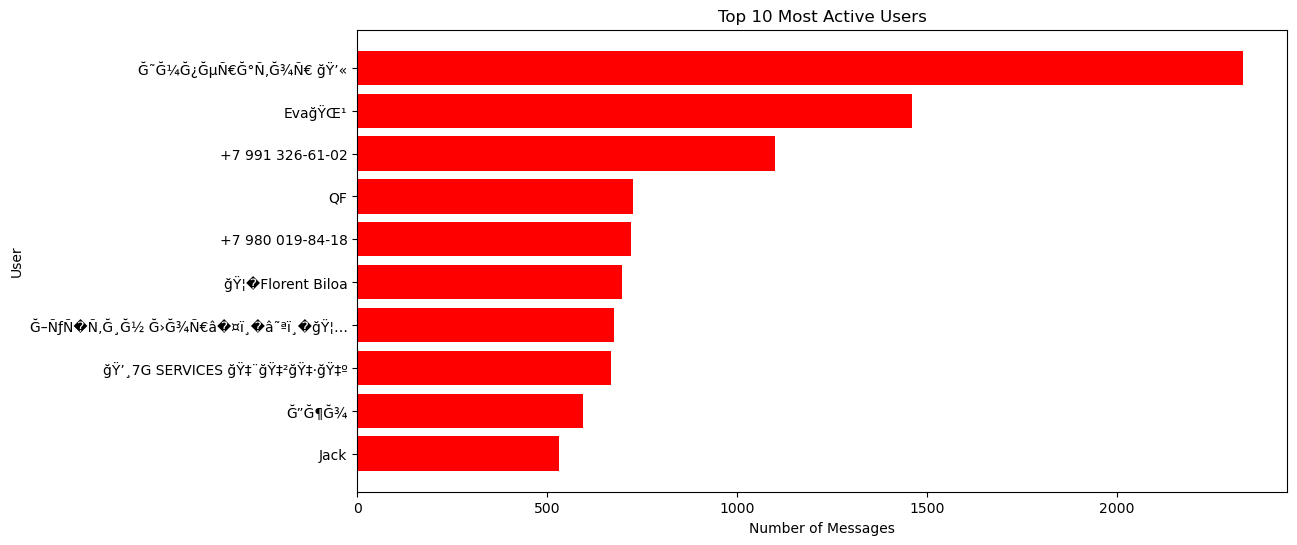

In [135]:


# ✅ Count messages per user
user_activity = df["user"].value_counts().reset_index()
user_activity.columns = ["user", "message_count"]

# ✅ Select top 10 most active users
top_users = user_activity.head(10)

# ✅ Plot bar chart
plt.figure(figsize=(12, 6))
plt.barh(top_users["user"], top_users["message_count"], color="red")

# Labels and title
plt.xlabel("Number of Messages")
plt.ylabel("User")
plt.title("Top 10 Most Active Users")
plt.gca().invert_yaxis()  # Invert y-axis to show the most active on top

# Show the plot
plt.show()


In [137]:

# ✅ Count messages per user
user_activity = df["user"].value_counts().reset_index()
user_activity.columns = ["user", "message_count"]

# ✅ Calculate percentage of total messages
total_messages = user_activity["message_count"].sum()
user_activity["percentage"] = (user_activity["message_count"] / total_messages) * 100

# ✅ Select top 10 users
top_users = user_activity.head(10)

# ✅ Display the table
top_users


user  message_count  percentage
0              Ğ˜Ğ¼Ğ¿ĞµÑ€Ğ°Ñ‚Ğ¾Ñ€ ğŸ’«           2332   13.093032
1                              EvağŸŒ¹           1460    8.197182
2                     +7 991 326-61-02           1099    6.170344
3                                   QF            725    4.070518
4                     +7 980 019-84-18            721    4.048060
5                    ğŸ¦�Florent Biloa            697    3.913312
6  Ğ–ÑƒÑ�Ñ‚Ğ¸Ğ½ Ğ›Ğ¾Ñ€â�¤ï¸�â˜ªï¸�ğŸ¦…            676    3.795407
7     ğŸ’¸7G SERVICES ğŸ‡¨ğŸ‡²ğŸ‡·ğŸ‡º            669    3.756106
8                               Ğ”Ğ¶Ğ¾            595    3.340632
9                                 Jack            530    2.975689

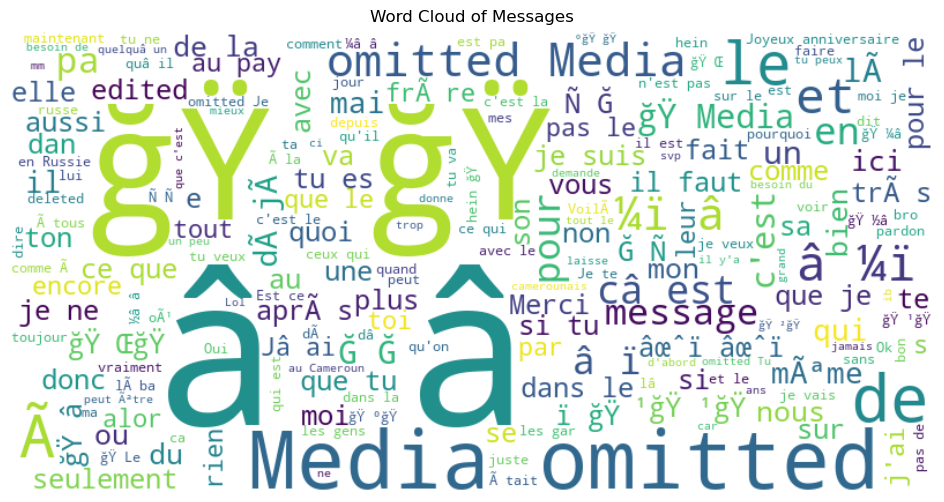

In [139]:


# ✅ Combine all messages into one text string
text = " ".join(df["message"].astype(str))

# ✅ Define stopwords (optional: add more custom stopwords)
stopwords = set(STOPWORDS)

# ✅ Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=stopwords, colormap="viridis").generate(text)

# ✅ Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.title("Word Cloud of Messages")
plt.show()


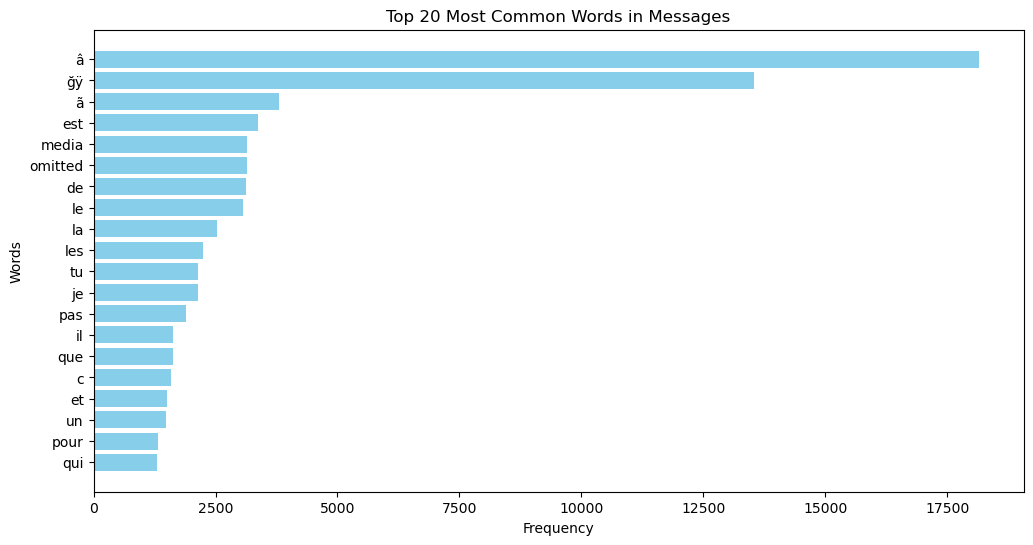

In [141]:
from collections import Counter

# ✅ Combine all messages into one text string
text = " ".join(df["message"].astype(str))

# ✅ Define stopwords (optional: add more if needed)
stopwords = set(STOPWORDS)

# ✅ Tokenize words (remove punctuation & convert to lowercase)
words = re.findall(r"\b\w+\b", text.lower())

# ✅ Remove stopwords
filtered_words = [word for word in words if word not in stopwords]

# ✅ Count word frequencies
word_counts = Counter(filtered_words)

# ✅ Get the top 20 most common words
top_words = word_counts.most_common(20)

# ✅ Convert to DataFrame for easy plotting
df_top_words = pd.DataFrame(top_words, columns=["word", "count"])

# ✅ Plot bar chart
plt.figure(figsize=(12, 6))
plt.barh(df_top_words["word"], df_top_words["count"], color="skyblue")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 20 Most Common Words in Messages")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


In [77]:
pip install emoji

  Using cached emoji-2.14.1-py3-none-any.whl.metadata (5.7 kB)
Using cached emoji-2.14.1-py3-none-any.whl (590 kB)
Note: you may need to restart the kernel to use updated packages.


In [143]:

import emoji

# ✅ Function to extract emojis from text
def extract_emojis(text):
    return [char for char in text if char in emoji.EMOJI_DATA]

# ✅ Apply function to extract emojis from all messages
all_emojis = []
for msg in df["message"].astype(str):
    all_emojis.extend(extract_emojis(msg))

# ✅ Count occurrences of each emoji
emoji_counts = Counter(all_emojis)

# ✅ Convert to DataFrame
df_emojis = pd.DataFrame(emoji_counts.items(), columns=["Emoji", "Count"])

# ✅ Sort by most used emojis
df_emojis = df_emojis.sort_values(by="Count", ascending=False).reset_index(drop=True)

# ✅ Display the top 10 emojis
df_emojis.head(10)


Emoji  Count
0     ©   8030
1     ™   3863
2     ®    205